**1. Dataset Overview**

**Convention:** Filename consists of 7 parts(numerical identifiers).

**Filename identifiers:** 

    - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

    - Vocal channel (01 = speech, 02 = song).

    - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

    - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

    - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

    - Repetition (01 = 1st repetition, 02 = 2nd repetition).

    - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pandas as pd
import os
from pydub import AudioSegment

In [2]:
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader


In [3]:
path = "/Users/academic-city-university/Naps/SpeechProcessing/lesson3/All-actors"

print("Path to files:", path)
print("Number of files:", len(os.listdir(path)))

Path to files: /Users/academic-city-university/Naps/SpeechProcessing/lesson3/All-actors
Number of files: 1440


In [4]:
sound_files_paths = []
emotions_classes = []
emotion_intensity_classes = []
statements_classes = []
repitition_classes = []

In [5]:
for file in os.listdir(path):
    if file.endswith(".wav") == False:
        audio = AudioSegment.from_file(os.path.join(path, file))
        audio.export(os.path.join(path, file.split(".")[0] + ".wav"), format="wav")
        os.remove(os.path.join(path, file))
    if file.endswith(".wav"):
        sound_files_paths.append(os.path.join(path, file))
        emotions_classes.append(file.split("-")[2])
        statements_classes.append(file.split("-")[4])
        emotion_intensity_classes.append(file.split("-")[3])
        repitition_classes.append(file.split("-")[5].split(".")[0])
    else:
        continue

In [6]:
# Defining filename identifiers
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',  
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}
emotion_intensity = {
    '01': 'normal',
    '02': 'strong'
}
statements = {
    '01': 'Kids are talking by the door',
    '02': 'Dogs are sitting by the door'
}
repitition = {
    '01': '1st',
    '02': '2nd'
}

In [7]:
print("Number of sound files:", len(sound_files_paths))

Number of sound files: 1440


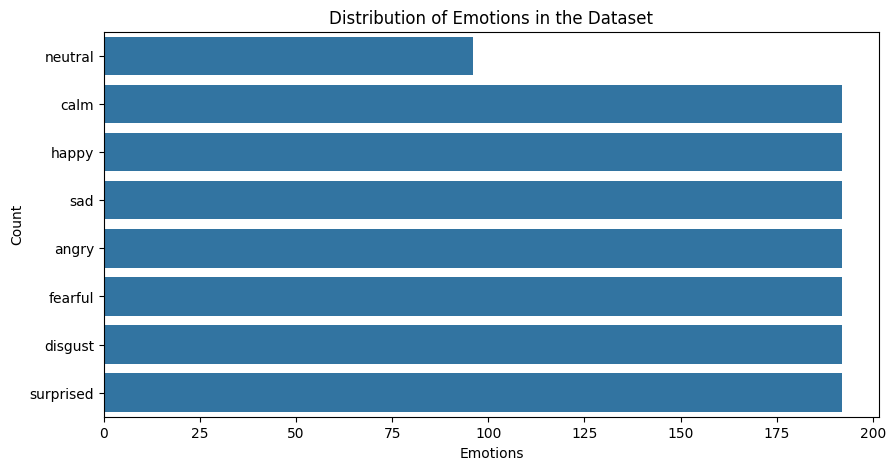

The count of each emotion intensity:
fearful      192
angry        192
surprised    192
calm         192
happy        192
sad          192
disgust      192
neutral       96
Name: count, dtype: int64


In [8]:
# Showing the count distribution of emotions using their names from the dicionary
emotion_names = [emotions[emo] for emo in emotions_classes]
plt.figure(figsize=(10, 5))
sns.countplot(emotion_names, order=list(emotions.values()))
plt.title("Distribution of Emotions in the Dataset")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

print("The count of each emotion intensity:")
print(pd.Series(emotion_names).value_counts())
plt.show()

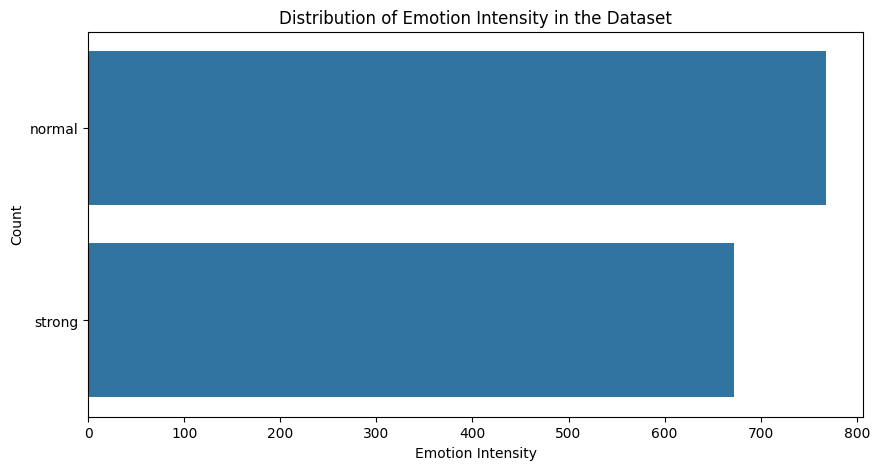

The count of each emotion intensity:
normal    768
strong    672
Name: count, dtype: int64


In [9]:
# Showing the count distribution of emotion intensity
emotion_intensity_names = [emotion_intensity[inten] for inten in emotion_intensity_classes]
plt.figure(figsize=(10, 5))
sns.countplot(emotion_intensity_names, order=list(emotion_intensity.values()))
plt.title("Distribution of Emotion Intensity in the Dataset")
plt.xlabel("Emotion Intensity")
plt.ylabel("Count")
plt.show()

print("The count of each emotion intensity:")
print(pd.Series(emotion_intensity_names).value_counts())
plt.show()

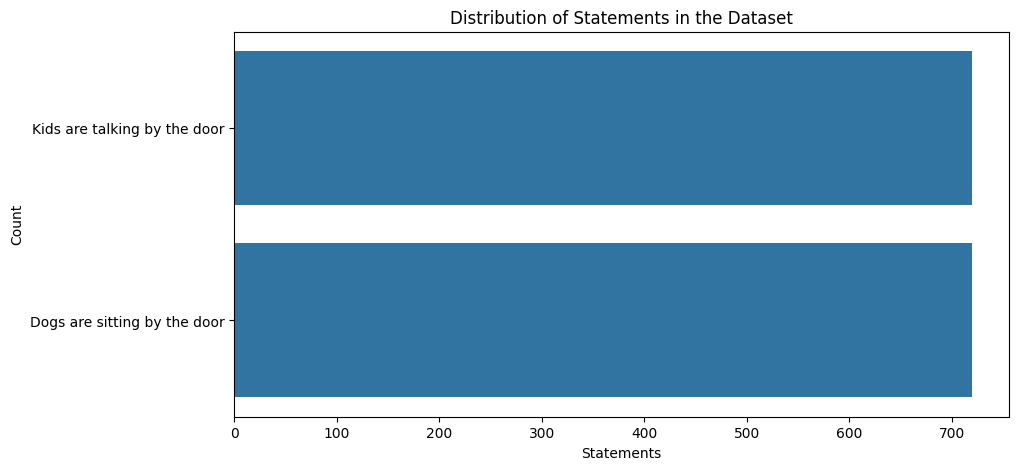

The count of each statement:
Dogs are sitting by the door    720
Kids are talking by the door    720
Name: count, dtype: int64


In [10]:
# Count distribution of statements
statement_names = [statements[stat] for stat in statements_classes]
plt.figure(figsize=(10, 5))
sns.countplot(statement_names, order=list(statements.values()))
plt.title("Distribution of Statements in the Dataset")
plt.xlabel("Statements")
plt.ylabel("Count")
plt.show()

print("The count of each statement:")
print(pd.Series(statement_names).value_counts())
plt.show()

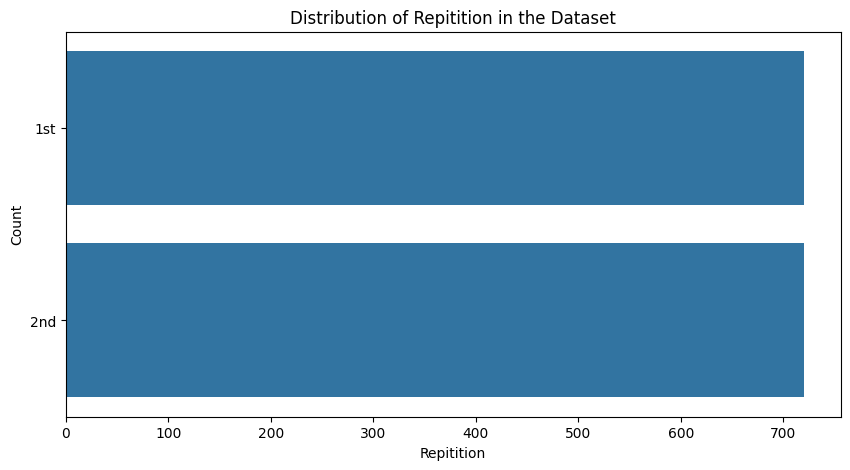

The count of each repitition:
2nd    720
1st    720
Name: count, dtype: int64


In [11]:
# Distribution of repitition
repitition_names = [repitition[rep] for rep in repitition_classes]
plt.figure(figsize=(10, 5))
sns.countplot(repitition_names, order=list(repitition.values()))
plt.title("Distribution of Repitition in the Dataset")
plt.xlabel("Repitition")
plt.ylabel("Count")
plt.show()

print("The count of each repitition:")
print(pd.Series(repitition_names).value_counts())
plt.show()

In [12]:
df = pd.DataFrame({
    'file_path': sound_files_paths,
    'emotion': emotion_names,
    'emotion_intensity': emotion_intensity_names,
    'statement': statement_names,
    'repitition': repitition_names
})

In [13]:
df.tail()

,file_path,emotion,emotion_intensity,statement,repitition
1435,/Users/academic-city-university/Naps/SpeechPro...,surprised,strong,Dogs are sitting by the door,1st
1436,/Users/academic-city-university/Naps/SpeechPro...,calm,strong,Kids are talking by the door,1st
1437,/Users/academic-city-university/Naps/SpeechPro...,calm,normal,Dogs are sitting by the door,1st
1438,/Users/academic-city-university/Naps/SpeechPro...,surprised,normal,Kids are talking by the door,1st
1439,/Users/academic-city-university/Naps/SpeechPro...,neutral,normal,Dogs are sitting by the door,2nd


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file_path          1440 non-null   object
 1   emotion            1440 non-null   object
 2   emotion_intensity  1440 non-null   object
 3   statement          1440 non-null   object
 4   repitition         1440 non-null   object
dtypes: object(5)
memory usage: 56.4+ KB


In [15]:
# Converting the categorical labels to numerical labels using dictionary
emotion_to_index = {v: k for k, v in emotions.items()}
df['emotion_label'] = df['emotion'].map(emotion_to_index).astype(int)
df['repitition_label'] = df['repitition'].map({'1st': 1, '2nd': 2}).astype(int)
df['statement_label'] = df['statement'].map({v: k for k, v in statements.items()}).astype(int)
df['emotion_intensity_label'] = df['emotion_intensity'].map({'normal': 1, 'strong': 2}).astype(int)

In [16]:
df.tail()

,file_path,emotion,emotion_intensity,statement,repitition,emotion_label,repitition_label,statement_label,emotion_intensity_label
1435,/Users/academic-city-university/Naps/SpeechPro...,surprised,strong,Dogs are sitting by the door,1st,8,1,2,2
1436,/Users/academic-city-university/Naps/SpeechPro...,calm,strong,Kids are talking by the door,1st,2,1,1,2
1437,/Users/academic-city-university/Naps/SpeechPro...,calm,normal,Dogs are sitting by the door,1st,2,1,2,1
1438,/Users/academic-city-university/Naps/SpeechPro...,surprised,normal,Kids are talking by the door,1st,8,1,1,1
1439,/Users/academic-city-university/Naps/SpeechPro...,neutral,normal,Dogs are sitting by the door,2nd,1,2,2,1


In [17]:
# Loading all audio sounds for preprocessing
class AudioPreprocessor():
    def __init__(self, file_path, sr=22050):
        self.file_path = file_path
        self.sr = sr
        self.audio = self.load_audio(file_path, sr)
        self.audio = self.normalize_audio(self.audio)
        self.audio = self.trim_silence(self.audio)
        self.audio = self.convert_to_mono(self.audio)
    
    
    def load_audio(self, file_path, sr):
        y, _ = librosa.load(file_path, sr=sr)
        return y
    
    def normalize_audio(self, y):
        return librosa.util.normalize(y)
    
    def trim_silence(self, y, top_db=20):
        return librosa.effects.trim(y, top_db=top_db)[0]
    
    def convert_to_mono(self, y):
        if y.ndim > 1:
            y = librosa.to_mono(y)
        return y
    
    def convert_to_spectrogram(self, n_mels=128, n_fft=2048, hop_length=512):
        S = librosa.feature.melspectrogram(y=self.audio, sr=self.sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
        S_dB = librosa.power_to_db(S, ref=np.max)
        return S_dB
    
    def save_spectrogram(self, S_dB, output_path):
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_dB, sr=self.sr, x_axis='time', y_axis='mel', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-frequency spectrogram')
        plt.tight_layout()
        plt.savefig(output_path)
        plt.close()
        
    def mfcc(self, n_mfcc=13):
        mfccs = librosa.feature.mfcc(y=self.audio, sr=self.sr, n_mfcc=n_mfcc)
        return mfccs

    def chroma(self):
        chroma = librosa.feature.chroma_stft(y=self.audio, sr=self.sr)
        return chroma

In [18]:
# Preprocessing all files in the dataframe and saving their features accordingly in a new folder
output_folder = "preprocessed_spectrograms"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
mfcc_folder = "preprocessed_mfccs"
if not os.path.exists(mfcc_folder):
    os.makedirs(mfcc_folder)
chroma_folder = "preprocessed_chromas"
if not os.path.exists(chroma_folder):
    os.makedirs(chroma_folder)
for index, row in df.iterrows():
    preprocessor = AudioPreprocessor(row['file_path'])
    spectrogram = preprocessor.convert_to_spectrogram()
    spectrogram_path = os.path.join(output_folder, f"spectrogram_{index}.png")
    preprocessor.save_spectrogram(spectrogram, spectrogram_path)
    
    df.at[index, 'spectrogram_path'] = spectrogram_path
  
  
    # Storing mfcc and chroma in the dataframe and saving them as .npy files
    mfcc = preprocessor.mfcc()
    mfcc_path = os.path.join(mfcc_folder, f"mfcc_{index}.npy")
    np.save(mfcc_path, mfcc)
    
    df.at[index, 'mfcc_path'] = mfcc_path
    
    chroma = preprocessor.chroma()
    chroma_path = os.path.join(chroma_folder, f"chroma_{index}.npy")
    np.save(chroma_path, chroma)
    
    df.at[index, 'chroma_path'] = chroma_path

In [51]:
from PIL import Image
import torch

class SpectrogramDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['spectrogram_path']

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.dataframe.iloc[idx]['emotion_label']
        return image, label


In [52]:
df.tail()

,file_path,emotion,emotion_intensity,statement,repitition,emotion_label,repitition_label,statement_label,emotion_intensity_label,spectrogram_path,mfcc_path,chroma_path
1435,/Users/academic-city-university/Naps/SpeechPro...,surprised,strong,Dogs are sitting by the door,1st,8,1,2,2,preprocessed_spectrograms/spectrogram_1435.png,preprocessed_mfccs/mfcc_1435.npy,preprocessed_chromas/chroma_1435.npy
1436,/Users/academic-city-university/Naps/SpeechPro...,calm,strong,Kids are talking by the door,1st,2,1,1,2,preprocessed_spectrograms/spectrogram_1436.png,preprocessed_mfccs/mfcc_1436.npy,preprocessed_chromas/chroma_1436.npy
1437,/Users/academic-city-university/Naps/SpeechPro...,calm,normal,Dogs are sitting by the door,1st,2,1,2,1,preprocessed_spectrograms/spectrogram_1437.png,preprocessed_mfccs/mfcc_1437.npy,preprocessed_chromas/chroma_1437.npy
1438,/Users/academic-city-university/Naps/SpeechPro...,surprised,normal,Kids are talking by the door,1st,8,1,1,1,preprocessed_spectrograms/spectrogram_1438.png,preprocessed_mfccs/mfcc_1438.npy,preprocessed_chromas/chroma_1438.npy
1439,/Users/academic-city-university/Naps/SpeechPro...,neutral,normal,Dogs are sitting by the door,2nd,1,2,2,1,preprocessed_spectrograms/spectrogram_1439.png,preprocessed_mfccs/mfcc_1439.npy,preprocessed_chromas/chroma_1439.npy


In [53]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
NUM_CLASSES = len(emotions)
DEVICE = torch.device("mps" if torch.mps.is_available() else "cpu")
print("Using device:", DEVICE)

Using device: mps


In [62]:
import albumentations as A

def transform_all(): 
    return transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    
def transform_train():
    return transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    
def albumentation_transform():
    return A.Compose([
        A.SpecAugment(num_masks=2, freq_mask_param=15, time_mask_param=20, p=0.5),
        A.TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
        A.PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
        A.AddGaussianNoise(var_limit=(10.0, 50.0), p=0.5)
    ])
    
dataset = SpectrogramDataset(df, transform=transform_all())
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = int(0.1 * train_size)
train_size = train_size - val_size

In [64]:
# Loading the data which has been transformed and augmented
full_train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size + val_size, test_size])
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

train_dataset.dataset.transform = transform_train()
val_dataset.dataset.transform = transform_all()
test_dataset.dataset.transform = transform_all()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
print("Number of training samples:", len(train_dataset))
print("Number of validation samples:", len(val_dataset))
print("Number of testing samples:", len(test_dataset))
    

Number of training samples: 1037
Number of validation samples: 115
Number of testing samples: 288


In [70]:
model = models.efficientnet_b0(pretrained=True)
for param in model.parameters():
    param.requires_grad = True
    
model.to(DEVICE)

/opt/anaconda3/envs/speech/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/speech/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
warmup_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, total_iters=5)

In [87]:
criterion = criterion.to(DEVICE)

In [88]:
def train_model(model, optimizer, scheduler, num_epochs=EPOCHS):
    best_val_acc = 0.0
    model.to(DEVICE)  # ensure model on correct device

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()  # convert to Python number

        scheduler.step()
        
        if warmup_scheduler is not None and epoch < 5:
            warmup_scheduler.step()

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset)  # keep as float32-compatible

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data).item()

        val_epoch_loss = val_running_loss / len(val_dataset)
        val_epoch_acc = val_running_corrects / len(val_dataset)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"Best model saved with accuracy: {best_val_acc:.4f}")

    print('Training complete')
    print(f'Best validation accuracy: {best_val_acc:.4f}')


In [ ]:
train_model(model, optimizer, scheduler, num_epochs=15)

In [84]:
# Evaluating the model on the test set
def evaluate_model(model):
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    model.to(DEVICE)

    test_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_running_corrects += torch.sum(preds == labels.data).item()

    test_acc = test_running_corrects / len(test_dataset)
    print(f'Test Acc: {test_acc:.4f}')
evaluate_model(model)

Test Acc: 0.4826
